In [2]:
#get the data
import pandas as pd
songs = pd.read_csv('test_songs.csv')

#preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np

info_cols = ['song_id','artist_name', 'album_name', 'artist_id', 'album_id']
X = songs.drop(songs[info_cols], axis=1)
(N,p) = X.shape

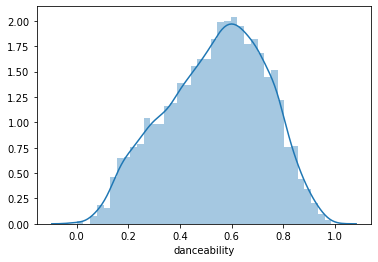

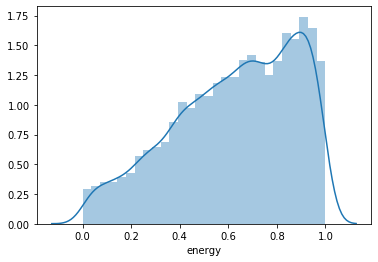

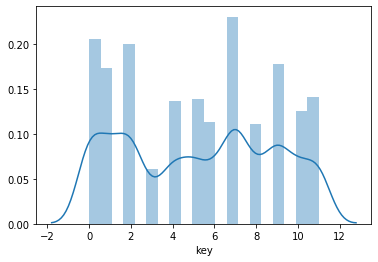

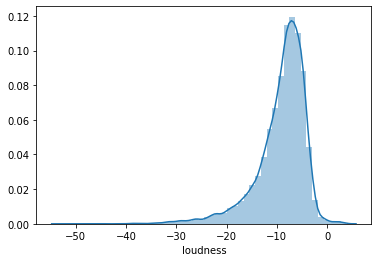

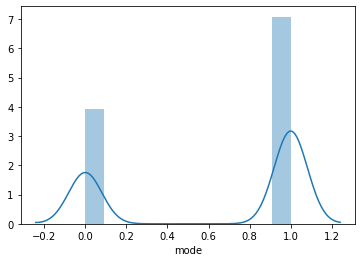

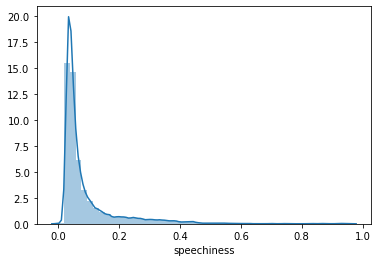

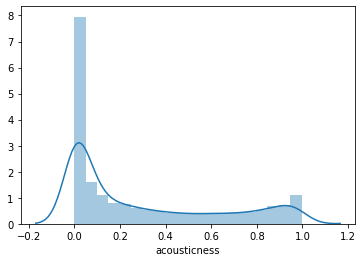

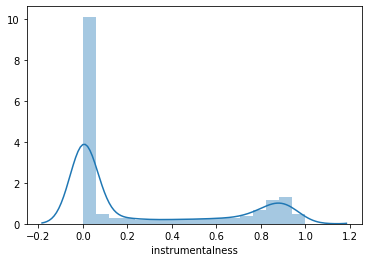

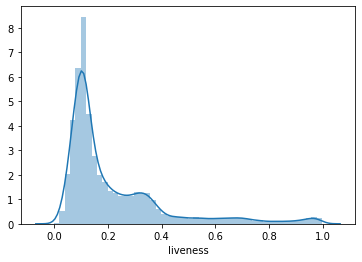

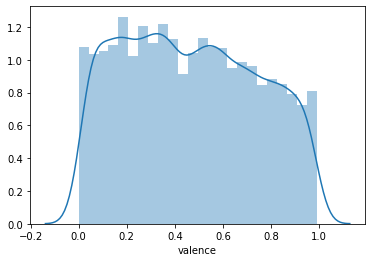

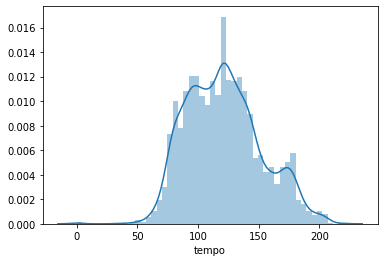

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

for i, col in enumerate(X.columns):
    plt.figure(i)
    sns.distplot(X[col])

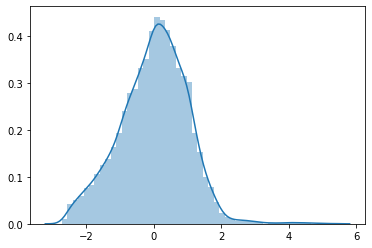

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
import numpy as np


bc = PowerTransformer(method='box-cox')
yj = PowerTransformer(method='yeo-johnson')
# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
rng = np.random.RandomState(304)
qt = QuantileTransformer(output_distribution='normal',
                         random_state=rng)
loudness_scaled = X.loudness.apply(lambda x: (x - np.min(X.loudness))/(np.max(X.loudness) - np.min(X.loudness))+1)
sns.distplot(bc.fit_transform(np.array(loudness_scaled).reshape(-1,1)));

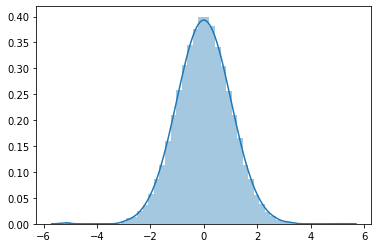

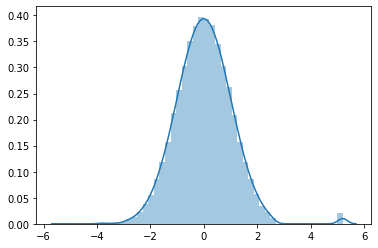

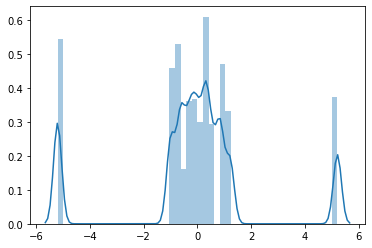

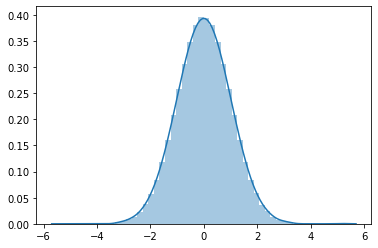

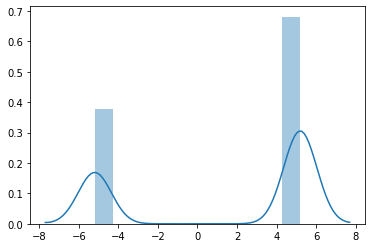

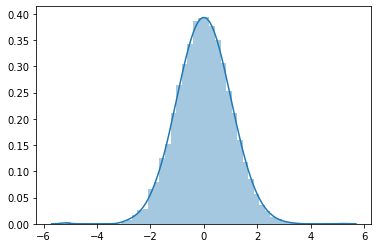

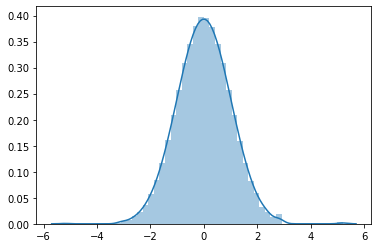

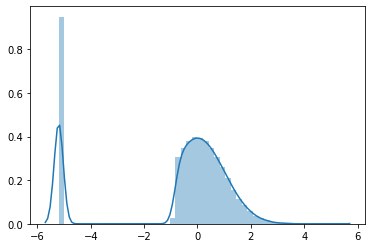

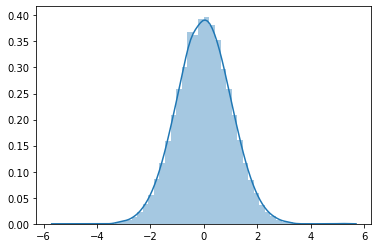

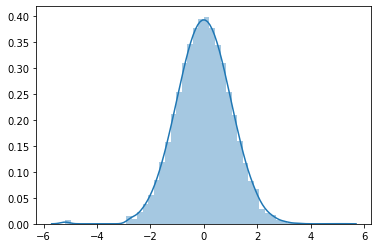

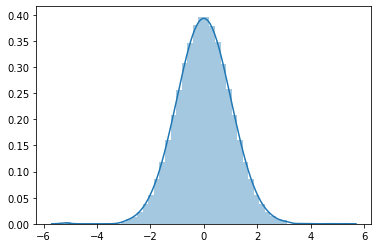

In [5]:
rng = np.random.RandomState(304)
qt = QuantileTransformer(output_distribution='normal',
                         random_state=rng)
for i, col in enumerate(X.columns):
    plt.figure(i)
    sns.distplot(qt.fit_transform(np.array(X[col]).reshape(-1,1)));

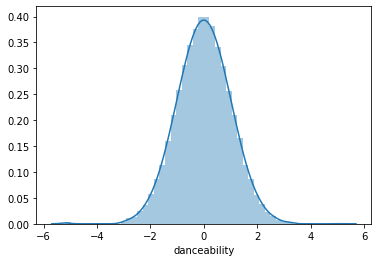

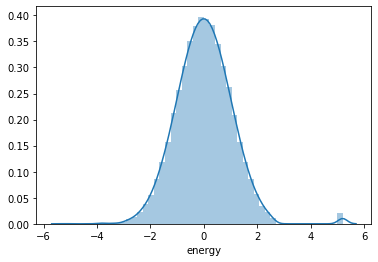

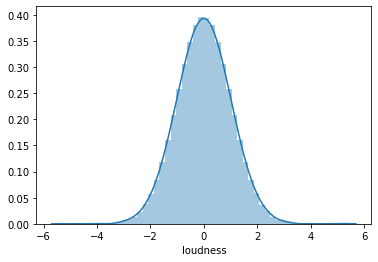

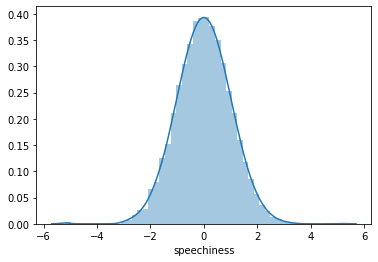

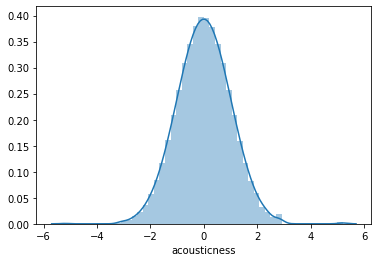

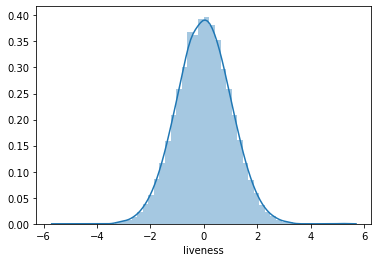

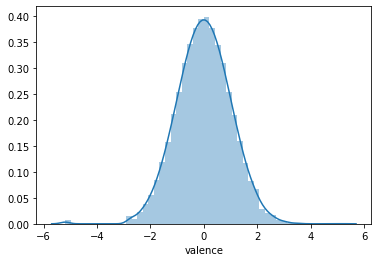

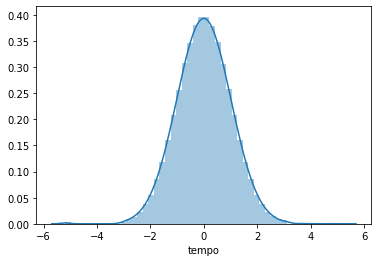

In [6]:
from copy import deepcopy


# (x - np.min(X.loudness))/(np.max(X.loudness) - np.min(X.loudness))

qt = QuantileTransformer(output_distribution='normal',
                         random_state=rng)
rng = np.random.RandomState(823)
keepers = ['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo']
X_keep = np.array(X[keepers])
X_t = qt.fit_transform(X_keep)
X_t_copy = deepcopy(X_t)
qt.get_params()
for i in range(X_t.shape[1]):
    X_t_copy[:,i] = (X_t[:,i]-np.min(X_t[:,i]))/(np.max(X_t[:,i])- np.min(X_t[:,i]))
X_f = pd.DataFrame(X_t, columns=keepers)

for i, col in enumerate(X_f.columns):
    plt.figure(i)
    sns.distplot(X_f[col])



Text(0, 0.5, 'Principal Component 2')

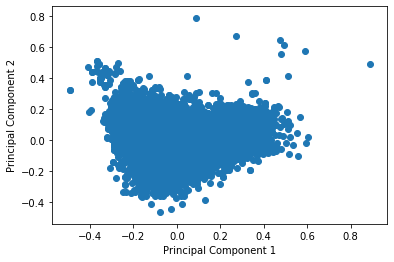

In [10]:
# yeah okay cool chart but how many clusters?
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_f)
projected2d = pca.fit_transform(X_f)
plt.scatter(x=projected2d[:,0], y=projected2d[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

C:\Users\timwi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\timwi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 154 missing from current font.
  font.set_text(s, 0, flags=flags)


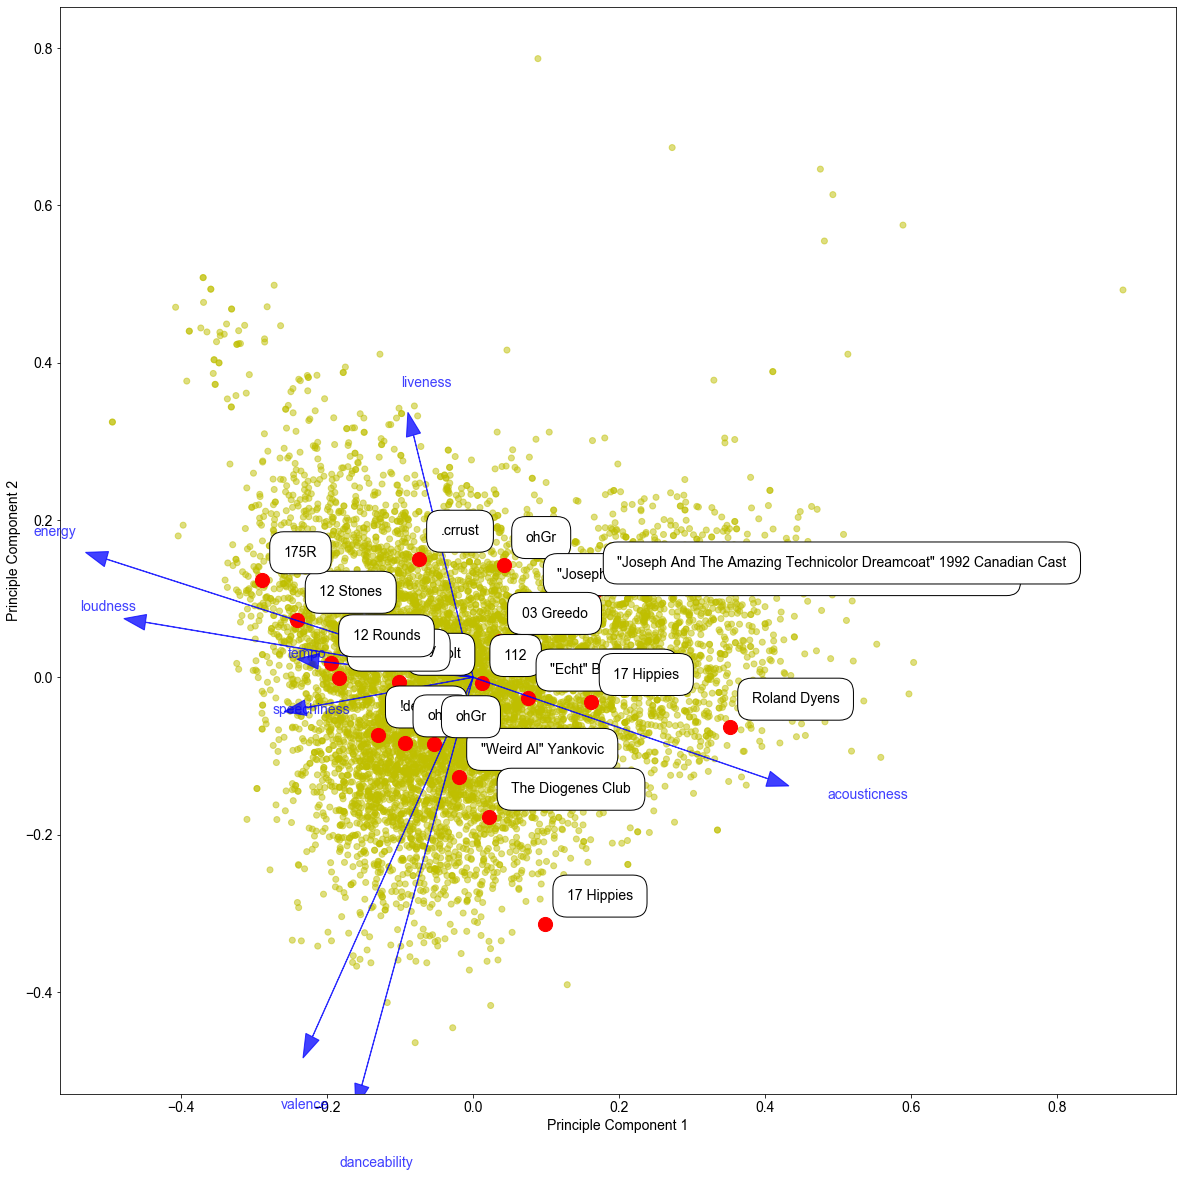

Features by importance:
 [(0.5403549310825718, 'danceability'), (0.523988251329406, 'energy'), (0.5070631197379133, 'valence'), (0.4540025095735024, 'loudness'), (0.4240232590743094, 'acousticness'), (0.31843235573514217, 'liveness'), (0.2324441253407875, 'speechiness'), (0.21243702808537687, 'tempo')]


In [11]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """

    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])
    plt.figure(figsize=(20,20))
    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

ax = draw_vectors(projected2d, pca.components_, X_f.columns.values)
T_df = pd.DataFrame(projected2d)
T_df.columns = ['component1', 'component2']

T_df['color'] = 'y'
T_df.loc[T_df['component1'] > 125, 'color'] = 'g'
T_df.loc[T_df['component2'] > 125, 'color'] = 'r'

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)

shifter = 0.03
import random
num_labels = 20
rand_idx = random.sample(range(0, len(X_f)), num_labels)
for idx in rand_idx:
    plt.scatter(T_df['component1'][idx], T_df['component2'][idx], marker='o', color='r', s=200)
#     plt.annotate(songs.artist_name[idx], (projected2d[idx,0],projected2d[idx,1]) )
    plt.text(T_df['component1'][idx]+shifter,T_df['component2'][idx]+shifter, songs.artist_name[idx], color='black', 
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

plt.show()

import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print( "Features by importance:\n", important_features)

get_important_features(projected2d, pca.components_, X_f.columns.values)

In [28]:
samplesong = qt.transform(X_keep[0].reshape(1,-1))
for i in range(samplesong.shape[1]):
    print((samplesong[:,i]-np.min(X_t[:,i]))/(np.max(X_t[:,i])- np.min(X_t[:,i])))

[0.60601739]
[0.49166493]
[0.51857382]
[0.54071648]
[0.4651061]
[0.45923953]
[0.50519034]
[0.50247477]


In [22]:
X_f.iloc[0]
# samplesong.shape

danceability    0.606017
energy          0.491665
loudness        0.518574
speechiness     0.540716
acousticness    0.465106
liveness        0.459240
valence         0.505190
tempo           0.502475
Name: 0, dtype: float64

In [26]:
X_t_copy[0]

array([0.60601739, 0.49166493, 0.51857382, 0.54071648, 0.4651061 ,
       0.45923953, 0.50519034, 0.50247477])

In [27]:
X_t[0]

array([ 1.10244037, -0.08667364,  0.19314317,  0.4233974 , -0.3628503 ,
       -0.42385485,  0.05397265,  0.0257343 ])